# Computing biophysical variables from Sentinel2 data

Note that you need a `grompy` database as input

In [1]:
import os, sys
sys.path.append("/home/wit015/Projects/ESA_carbon/src")
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import grompy
from snap_biovar import compute_biovar

In [2]:
grompy_path = Path("/data/wit015/groenmonitor/")
grompy_yaml = grompy_path / "grompy.yaml"
dap = grompy.DataAccessProvider(grompy_yaml)
print(f"Number of fields in grompy database: {len(dap)}")

Number of fields in grompy database: 772563


In [3]:
dap = grompy.DataAccessProvider(grompy_yaml, gws_gewasc=2014, area_gt=28, provincie="Flevoland")
print(f"Number of fields in grompy database: {len(dap)}")

Number of fields in grompy database: 7


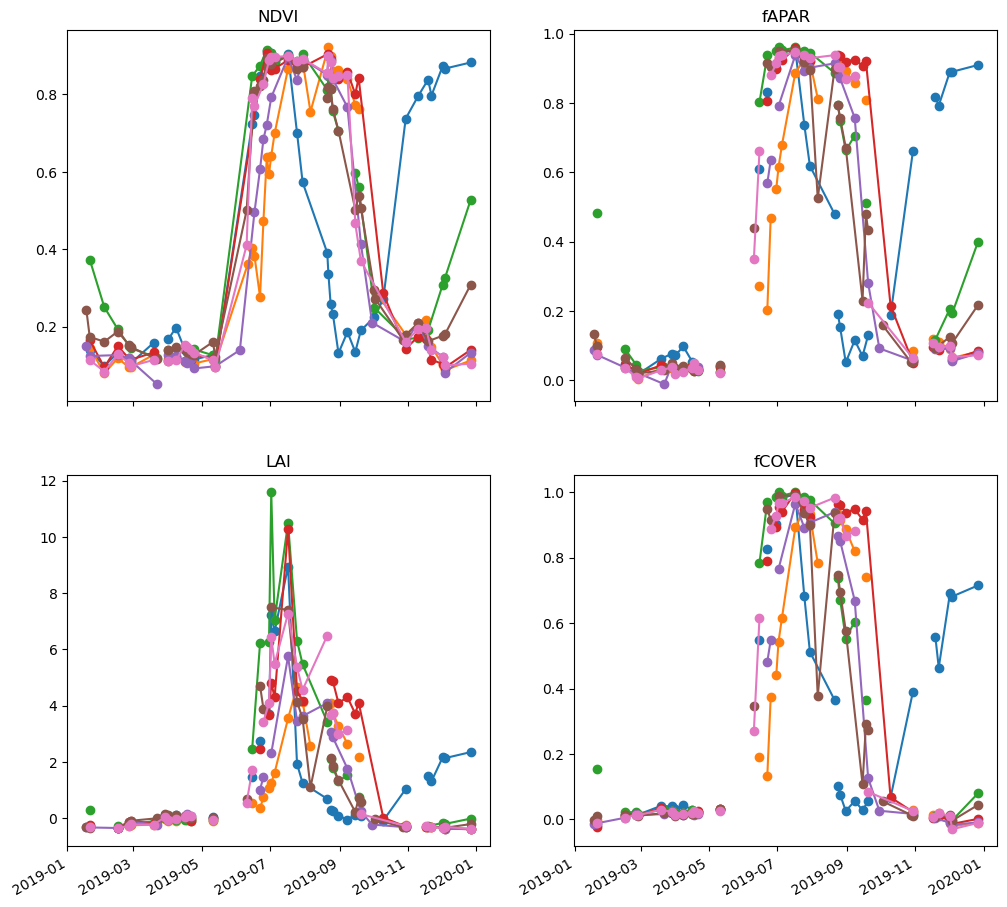

In [4]:
def generate_biovar(dap, view_zenith_mean=None, view_azimuth_mean=None):
    fig, axes = plt.subplots(figsize=(12,12), ncols=2, nrows=2)
    axes = axes.flatten()

    for parcel_info, parcel_data in dap:
        df = parcel_data.sentinel2_reflectance_values
        df = compute_biovar(df, longitude=5.59, latitude=52.49, timezone="Europe/Amsterdam",
                   view_zenith_mean=5.0, view_azimuth_mean=90.)

        axes[0].plot(df.index, df.NDVI, marker="o")
        axes[1].plot(df.index, df.fapar, marker="o")
        axes[2].plot(df.index, df.lai, marker="o")
        axes[3].plot(df.index, df.fcover, marker="o")

    axes[0].set_title("NDVI")
    axes[1].set_title("fAPAR")
    axes[2].set_title("LAI")
    axes[3].set_title("fCOVER")
    fig.autofmt_xdate()
    
    return fig, df


fig, df = generate_biovar(dap, view_zenith_mean=5.0, view_azimuth_mean=90.)

In [5]:
df.head()


day     B02     B03     B04     B05     B06     B07  \
day                                                                      
2019-01-21  2019-01-21  0.0568  0.0544  0.0618  0.0675  0.0689  0.0720   
2019-02-03  2019-02-03     NaN     NaN     NaN     NaN     NaN     NaN   
2019-02-15  2019-02-15  0.0385  0.0573  0.0712  0.0768  0.0784  0.0822   
2019-02-25  2019-02-25  0.0721  0.0949  0.1146  0.1229  0.1243  0.1290   
2019-02-27  2019-02-27  0.0889  0.1076  0.1277  0.1374  0.1373  0.1422   

               B08     B11     B12     B8A    NDVI                    day_tz  \
day                                                                            
2019-01-21  0.0785  0.0789  0.0661  0.0751  0.1141 2019-01-21 10:30:00+01:00   
2019-02-03     NaN     NaN     NaN     NaN  0.0842 2019-02-03 10:30:00+01:00   
2019-02-15  0.0920  0.1125  0.0996  0.0881  0.1283 2019-02-15 10:30:00+01:00   
2019-02-25  0.1419  0.1769  0.1671  0.1355  0.1066 2019-02-25 10:30:00+01:00   
2019-02-27  0.1553  0.1937  0.1917  0.1479  0.0983 2019-02-27 10:30:00+01:00   

            solar_azimuth  solar_zenith     fapar       lai    fcover  
day                                                                    
2019-01-21     146.878531     78.371309  0.076966 -0.332127 -0.011319  
2019-02-03     145.049036     75.459646       NaN       NaN       NaN  
2019-02-15     143.494889     71.935488  0.035298 -0.356274  0.004170  
2019-02-25     142.323645     68.525504  0.009787 -0.285126  0.014909  
2019-02-27     142.102061     67.803639  0.005899 -0.223031  0.012939